In [11]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:90%;}
div.cell.code_cell.unrendered{width:90%;}
div.CodeMirror {font-family:Consolas; font-size:13pt;}
div.output {font-size:13pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:13pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
span.toc-item-num{display:none;}
div.text_cell_render ul li{font-size:18pt;padding:5px;}
div.CodeMirror-lines > div {padding-left:10px;}
div.rendered_html {margin-left: 0;}
</style>
"""))

In [6]:
result1 = 0
result2 = 0

def add (n1,n2):
    return n1+n2
    
def sub (n1,n2):
    return n1 - n2

# main

x = 10
y = 20
print(add(x,y))
print(sub(x,y))


30
-10


# 계산기 도식화

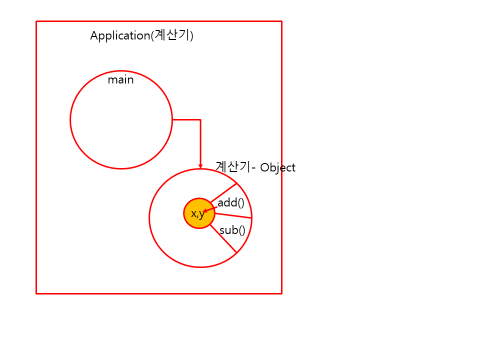

| 메모리 영역       | 설명                                               |
| ------------ | ------------------------------------------------ |
| **Code 영역**  | 클래스 및 함수 정의 코드가 저장됨 (예: `Calculator` 클래스 정의 등)   |
| **Stack 영역** | 지역 변수와 참조 변수(주소값)가 저장됨 (예: `cobj`, `result` 등)   |
| **Heap 영역**  | `Calculator()`와 같은 객체 생성 시 실제 인스턴스(데이터)가 저장되는 공간 |

| 개념           | 메모리 위치         | 예시                     |
| ------------ | -------------- | ---------------------- |
| 클래스 정의       | Code 영역        | `class Calculator:`    |
| 객체 인스턴스      | Heap 영역        | `Calculator()` 호출 결과   |
| 참조 변수        | Stack 영역       | `cobj`                 |
| 속성값 (x, y 등) | Heap 내 인스턴스 내부 | `self.x`, `self.y`     |
| 주소값          | Stack에 저장      | `0x1000` 같은 Heap 주소 참조 |

| 주소 (가정)  | 내용                                                  |
| -------- | --------------------------------------------------- |
| `0x1000` | `cobj1`이 참조하는 `Calculator()` 인스턴스 (x=10, y=20)      |
| `0x2000` | `cobj2`가 참조하는 또 다른 `Calculator()` 인스턴스 (x=10, y=20) |

| 항목               | 설명                                |
| ---------------- | --------------------------------- |
| `Calculator()`   | 호출 시마다 **Heap에 새로운 인스턴스 생성**      |
| `cobj1`, `cobj2` | 서로 **다른 인스턴스를 참조하는 Stack 변수**     |
| 같은 클래스 사용        | 클래스가 같아도 **각 객체는 독립된 메모리 공간**을 가짐 |


In [28]:
# 클래스 --> new --> 객체생성
# 클래스 = 객체의 스타일 또는 정의문 = 구성요소(데이터 +메소드)

class Calculator:
    
    def __init__(self): # =>초기화함수를 부름
        # x = 100 # 지역변수
        self.x = 10 # 속성변수 # 하지만 x,y값에 쓰레기값이 있기 때문에 초기화를 해줘야한다 __init__()
        self.y = 20 # 속성
        
    def add(self): # (self, num1, num2) # 매개변수 지정시 # add라는 기능
        result = self.x + self.y # obj 소속이라 메모리에 남음
        return result # 끝나면 사라짐
    
cobj = Calculator()
"""
# new라는 명령은 '쓰고 버린다'라는 암묵적인 표현 => 생성자 함수를 호출함
# cobj는 stack에 담겨 공간을 확보하며, 주소가 없으면 null 상태가 됨
# 객체는 사전에 크기가 정해지지 않기 때문에 stack에 직접 만들 수 없고,
# heap 영역에 메모리를 할당하여 객체를 생성함
# 생성된 객체는 초기에는 쓰레기 값을 가지고 있음
# 반면, 주소값은 고정된 크기를 가지므로 stack에 저장할 수 있음
# 함수는 정의문이 코드 영역에 올라가면서 주소값이 확보됨
# 하지만 객체의 속성 x, y는 쓰레기값이므로 초기화를 해줘야 함 → __init__() 사용
# self를 사용하면, obj의 호출에 따라 각기 다른 메모리 주소(즉, 인스턴스)를 참조할 수 있음

"""
cobj.x # 정보 은닉 위배
cobj2 = Calculator()
cobj2.x = 100
print(id(cobj2.x))
print(id(cobj.x))

2494026222928
2494026220048


In [31]:
x = 10
print(type(x))

<class 'int'>


In [49]:
a = 10
b = 34.6
c = "안녕하세요"
d = True
e = [1,2,3]


print(type(a))
print(type(b))
print(type(c))
print(type(d))
print(type(e))

<class 'int'>
<class 'float'>
<class 'str'>
<class 'bool'>
<class 'list'>


In [39]:
c.count('e')
print(id(c))

2494128052528


In [54]:
ecoded = c.encode() 
decode = ecoded.decode('utf-8')# 문자셋이 안맞으면 error
#c.encode().decode('utf-8')
decode

'안녕하세요'

In [60]:
x= "3720"
if x.isdigit():
    result = float(x)+20
    print(result)
else:
    print("숫자가 아님")

3740.0


● 기능 요구

Contact 클래스 생성: name, phone, email 속성

파일 읽어 리스트에 객체 저장

사용자 검색 기능 구현 (search_by_name())

In [1]:
# 풀이 1
def read_contacts(filename):
    contactsList=[]
    with open(filename,"r") as f:
        text = f.read().split('\n')
        for i in text:
            name, phone, email = i.split(',')
            contactsList.append(f"{name},{phone},{email}")
        f.close()
        '''
        while ((ch = f.read())!=-1):
            line = []
            line.append(ch)
            if(ch == "\n"):
        - 일반 프로그래밍에서는 이렇게 한다
                
        '''
    return contactsList


def search_contact(contacts, keyword):
    results = []
    for i in contacts:
        if keyword.lower() in i.lower():
            results.append(i)
            print(i)
            
    return results

def print_contacts(contacts):     #출력 형식
    for c in contacts:
        name, phone, email = c.split(',')
        print(f"이름: {name}, 전화번호: {phone}, 이메일: {email}")
        
## -- main --
con = read_contacts("contacts.txt")
print(con)
print_contacts(con)
keyword = input("검색할 이름 키워드: ")
search_contact(con,keyword)

['Kim,01012345678,seoul@example.com', 'Lee,01098765432,lee@example.com']
이름: Kim, 전화번호: 01012345678, 이메일: seoul@example.com
이름: Lee, 전화번호: 01098765432, 이메일: lee@example.com
검색할 이름 키워드: lee
Lee,01098765432,lee@example.com


['Lee,01098765432,lee@example.com']

In [19]:
#1단계 : 모듈화
#2단계 : 모듈화된 함수에 대하여 입력과 출력을 정의한다.
def read_contacts(filename):  #입력과 출력
    contactList=[]  #빈 리스트 객체를 생성
    #contactList=[['kim','00-00000'.'@.com'],['Lee','11-00000'.'sd@.com']]
    with open(filename,'r', encoding='utf-8') as f:

        for line in f:
            split_line =line.strip().split(',')  #['kim','00-00000'.'@.com']
            contactList.append(split_line)  ## 한사람의 리스트를 전체리스트에 추가
    #print("Out of file") 
    return contactList

def print_contacts(contacts):
    for one in contacts:   #one=['kim','00-00000'.'@.com']
        print("이름:",one[0], end='\t')
        print("전화번호:",one[1], end='\t')
        print("이메일:",one[2])

def search_contact(contacts, keyword):
    # 문자열 비교 - 
    results=[]
    
    for conOne in contacts:
        if keyword.lower() in conOne[0].lower():
            results.append(conOne)
    return results

    
##---main
clist=read_contacts('contacts.txt')   #clist=[['kim','00-00000'.'@.com'],['Lee','11-00000'.'sd@.com']]
print_contacts(clist)
slist = search_contact(clist,'kim')
slist

이름: Kim	전화번호: 01012345678	이메일: seoul@example.com
이름: Lee	전화번호: 01098765432	이메일: lee@example.com


[['Kim', '01012345678', 'seoul@example.com']]

In [ ]:
a = []
b = [10,29.5, 'Hello', True]
c = [10,20, [1,2,3,4],['a','b']]

In [ ]:
# 풀이 2
# Contact 클래스 정의
class Contact:
    def __init__(self, name, phone, email):
        self.name = name
        self.phone = phone
        self.email = email

    ### 필요 기능 추가

# 주소록 관리 클래스
class ContactBook:
    def __init__(self):
        self.contacts = []

    ### 필요 기능 추가

In [ ]:
# 실행 예시
book = ContactBook()
book.load_from_file('contacts.txt')
keyword = input("검색할 이름 키워드: ")
results = book.search(keyword)
book.display_contacts(results)